# mandelbrot

In [1]:
import tensorflow as tf
import numpy as np

import PIL.Image
from io import BytesIO
from IPython.display import Image, display

from utils import get_meshgrid, fractal_to_img

In [2]:
def display_img(img, fmt='png'):
    f = BytesIO()
    PIL.Image.fromarray(img).save(f, fmt)
    display(Image(data=f.getvalue()))

In [3]:
# center
X = 0.0
Y = 0.0
R = 2.0

# interesting spot
# X = 0.267235642726
# Y = -0.003347589624
# R = 1.15E-10

Z = get_meshgrid(X, Y, R)

In [4]:
tf.reset_default_graph()

xs = tf.constant(Z, name='xs')
zs = tf.Variable(xs, name='zs')
ns = tf.Variable(tf.zeros_like(xs, tf.float32), name='ns')

c = tf.constant(-0.624 + 0.435j, name='c')

# zs_ = zs * zs + xs # mandelbrot
zs_ = zs**2 + c # julia
not_diverged = tf.abs(zs_) < 4 # uses zs_ instead of zs, therefore the first circle is at radius 2.0

update_zs = zs.assign(zs_)
update_ns = ns.assign_add(tf.cast(not_diverged, tf.float32))
update_step = tf.group(update_zs, update_ns)

init_op = tf.global_variables_initializer()

# writer = tf.summary.FileWriter('./logdir')
# writer.add_graph(tf.get_default_graph())

with tf.Session() as sess:
    init_op.run()
    for i in range(128):
        update_step.run()
    
    ns_np = ns.eval()

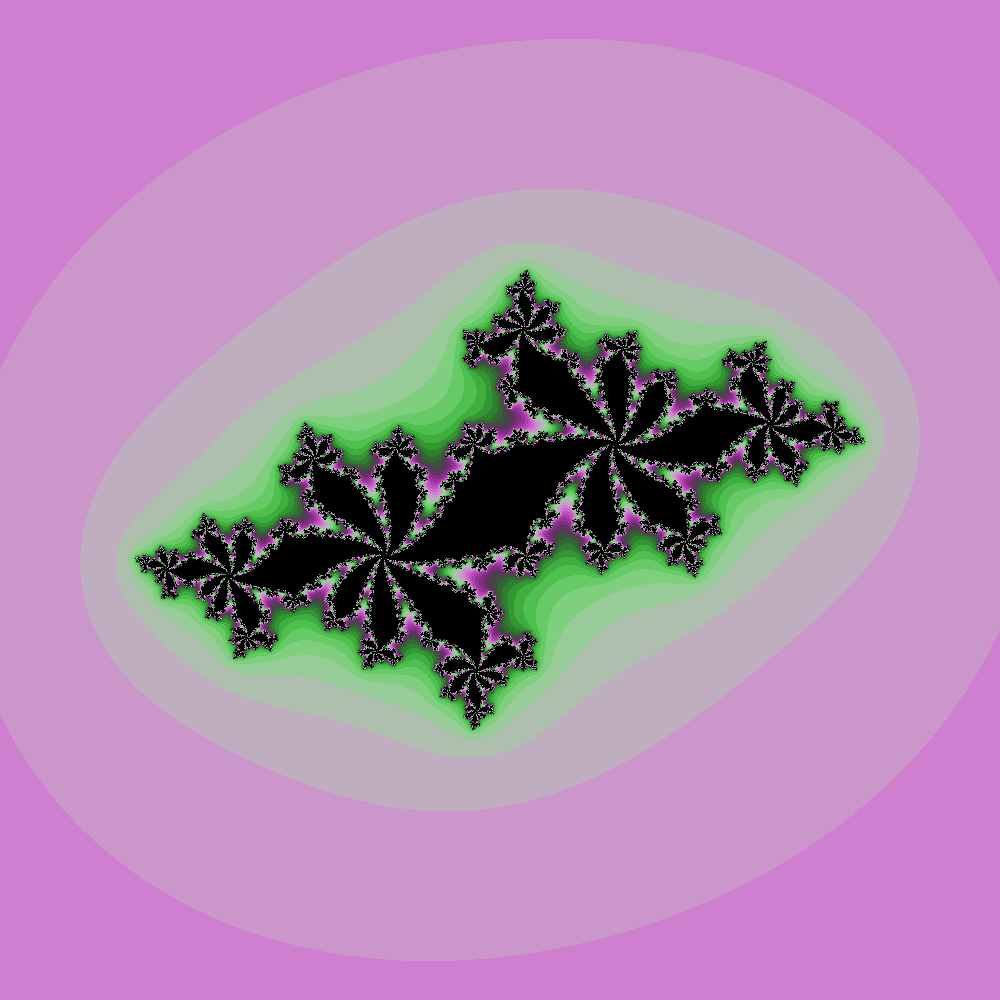

In [5]:
img = fractal_to_img(ns_np)
display_img(img)